# VGG16 Model 0
> Hardware: Google Collab GPU

> Software: Tensorflow, Keras

> Dataset: 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). <br>
https://data.mendeley.com/datasets/rscbjbr9sj/2

This model objective is to classify pneumonia in chest x-ray. This model initial build from the guidance from community and resources such as Tensorflow Community, Google Colab Community, Medium and other resources. Specific project that are closely related to this can be found below.

### Reference
- Google Collab - rock, paper, scissors notebook: <br>
https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=LWTisYLQM1aM

- Easy to understand notebook: <br>
https://www.kaggle.com/joythabo33/99-accurate-cnn-that-detects-pneumonia/notebook

- Unit8 pneumonia git: <br>
https://github.com/unit8co/amld-workshop-pneumonia/tree/master/3_pneumonia





In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 84kB/s 
     |████████████████████████████████| 3.8MB 27.0MB/s 
     |████████████████████████████████| 450kB 48.7MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
!ls /content/

sample_data


In [0]:
!du -s /content/data/chest_xray

1219956	/content/data/chest_xray


In [0]:
!du /content/data/chest_xray

du: cannot access '/content/data/chest_xray': No such file or directory


In [0]:
!pwd

/content


## Make directory

To save the dataset

In [0]:
!mkdir /content/data/

## Download the dataset

Downloading from unit8 instead of from directly mendely database since this dataset is splitted and available to downloaded here.

In [0]:
!wget --no-check-certificate \
    https://s3.eu-central-1.amazonaws.com/public.unit8.co/data/chest_xray.tar.gz \
    -O /content/data/chest_xray.tar.gz

--2019-11-14 06:11:29--  https://s3.eu-central-1.amazonaws.com/public.unit8.co/data/chest_xray.tar.gz
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.72.143
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.72.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225393795 (1.1G) [application/x-gzip]
Saving to: ‘/content/data/chest_xray.tar.gz’

/content/data/chest 100%[===================>]   1.14G  98.2MB/s    in 12s     

2019-11-14 06:11:41 (95.9 MB/s) - ‘/content/data/chest_xray.tar.gz’ saved [1225393795/1225393795]



## Extract the downloaded zip file

In [0]:
import os
import tarfile

tar = tarfile.open("data/chest_xray.tar.gz")
tar.extractall(path='./data/')
os.remove('data/chest_xray.tar.gz')

## Data preprocessing and manipulation

In [0]:
import keras_preprocessing
from keras_preprocessing.image import ImageDataGenerator # Data preprocessing and augmentation

TRAINING_DIR = "/content/data/chest_xray/train"
VALIDATION_DIR = "/content/data/chest_xray/val"
TEST_DIR = "/content/data/chest_xray/test"

# TODO: Data augmentation - Fiddle with images for training
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

# Create training data batch
# TODO: Try grayscaling the image to see what will happen
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150), # Resize the image to 150px x 150px; Why? idk... Check Unit8 work..
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
train_generator.image_shape

(150, 150, 3)

## Define the Model
VGG16 model for Keras

This is the Keras model of the 16-layer network used by the VGG team in the ILSVRC-2014 competition.

It has been obtained by directly converting the Caffe model provived by the authors.

Details about the network architecture can be found in the following arXiv paper:

Very Deep Convolutional Networks for Large-Scale Image Recognition
K. Simonyan, A. Zisserman
arXiv:1409.1556

In the paper, the VGG-16 model is denoted as configuration D. It achieves 7.5% top-5 error on ILSVRC-2012-val, 7.4% top-5 error on ILSVRC-2012-test.


In [0]:
#VGG16 Model
model = tf.keras.models.Sequential([
    # First convolution layer
    tf.keras.layers.ZeroPadding2D((1,1),input_shape=train_generator.image_shape),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    
    # Second convolution layer
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    
    # Third convolution layer
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    
    # Fourth convolution layer
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    
    # Fifth convolution layer
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    
    # Flatten the results and feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 152, 152, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 152, 152, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 77, 77, 64)        0         
_________________________________________

## Callbacks function

In [0]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience = 3, monitor = "val_accuracy", mode="max", verbose = 1)

## Compile the model

Here we use the "cross-entropy" loss function, which works well for learning probability distributions for classification. 

See e.g.: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy

In [0]:
# optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
optimizer = 'rmsprop'
model.compile(loss='categorical_crossentropy',     
              optimizer=optimizer, 
              metrics=['accuracy'])

Since the training set is un-balanced. Calculate the classweight to be used for weight balancing to solve accuracy and loss being stucked.

In [0]:
import sklearn
import numpy as np

classweight = sklearn.utils.class_weight.compute_class_weight('balanced', np.unique(train_generator.labels), train_generator.labels)
print(classweight)

[1.9448173  0.67303226]


## Train the model

Epoch 1/100
163/163 [==============================] - 116s 712ms/step - loss: 1190.6147 - acc: 0.7349 - val_loss: 0.8432 - val_acc: 0.5000
Epoch 2/100
163/163 [==============================] - 109s 671ms/step - loss: 0.5921 - acc: 0.7370 - val_loss: 0.9222 - val_acc: 0.5000
Epoch 3/100
163/163 [==============================] - 110s 675ms/step - loss: 0.5723 - acc: 0.7429 - val_loss: 0.8318 - val_acc: 0.5000
Epoch 4/100
163/163 [==============================] - 110s 673ms/step - loss: 0.5727 - acc: 0.7429 - val_loss: 0.8482 - val_acc: 0.5000
Epoch 5/100
163/163 [==============================] - 109s 669ms/step - loss: 0.5740 - acc: 0.7429 - val_loss: 0.7923 - val_acc: 0.5000
Epoch 6/100
163/163 [==============================] - 109s 668ms/step - loss: 0.5732 - acc: 0.7429 - val_loss: 0.8334 - val_acc: 0.5000
Epoch 7/100
163/163 [==============================] - 108s 666ms/step - loss: 0.5713 - acc: 0.7429 - val_loss: 0.7943 - val_acc: 0.5000
Epoch 8/100
163/163 [=================

OSError: ignored

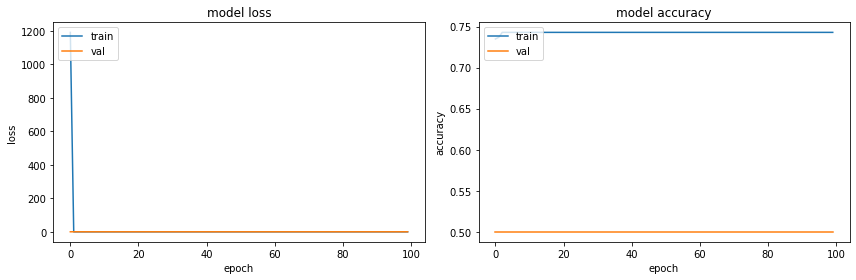

In [0]:
# Training process
history = model.fit_generator(
    generator=train_generator, 
    # steps_per_epoch=500, 
    epochs=100,
    # callbacks=[early_stopping_monitor],
    shuffle=True, 
    validation_data=validation_generator, 
    # validation_steps=10, 
    class_weight=classweight,
    verbose = 1
    )

# model.save("pneumonia_detection_v1")

### Plot training
import matplotlib.pyplot as plt
def plot_learning_curves(history):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    
plot_learning_curves(history)

## Load best weight
idx = np.argmin(history.history['val_loss']) 
model.load_weights("/content/data/model/weights.epoch_{:02d}.hdf5".format(idx + 1))

print("Loading the best model")
print("epoch: {}, val_loss: {}, val_acc: {}".format(idx + 1, history.history['val_loss'][idx], history.history['val_acc'][idx]))

## Evaluate the model
test_loss, test_acc = model.evaluate_generator(generator=test_generator, verbose=1)

## Analytics
from sklearn.metrics import accuracy_score, confusion_matrix

test_generator.reset()
test_preds = model.predict_generator(test_generator, verbose=1)
test_preds = np.argmax(test_preds,axis=1)

acc = accuracy_score(test_generator.classes, test_preds)*100
cm = confusion_matrix(test_generator.classes, test_preds)
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)
# plot_confusion_matrix(cm, target_names=['NORMAL', 'PNEUMONIA'], normalize=False)


print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}%'.format(np.round((history.history['acc'][-1])*100, 14)))

In [0]:
modified_loss = history.history['loss'[0:100]]
modified_loss = modified_loss[1:100] #remove the first value recorded in loss since it's an outlier

modified_val_loss = history.history['val_loss']
modified_val_loss = modified_val_loss[1:100]

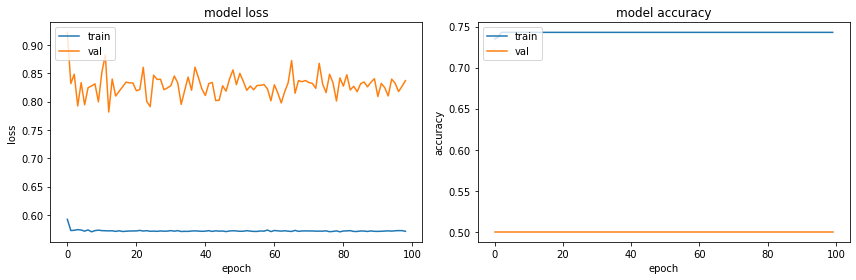

In [0]:
### Plot training
import matplotlib.pyplot as plt
def plot_learning_curves(history):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    # plt.plot(history.history['loss'])
    # plt.plot(history.history['val_loss'])
    plt.plot(modified_loss) # These changes are made because of the first record of loss is an outlier.
    plt.plot(modified_val_loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    
plot_learning_curves(history)

In [0]:
## Evaluate the model
test_loss, test_acc = model.evaluate_generator(generator=test_generator, verbose=1)

## Analytics
from sklearn.metrics import accuracy_score, confusion_matrix

test_generator.reset()
test_preds = model.predict_generator(test_generator, verbose=1)
test_preds = np.argmax(test_preds,axis=1)

acc = accuracy_score(test_generator.classes, test_preds)*100
cm = confusion_matrix(test_generator.classes, test_preds)
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)
# plot_confusion_matrix(cm, target_names=['NORMAL', 'PNEUMONIA'], normalize=False)


print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}%'.format(np.round((history.history['acc'][-1])*100, 14)))

20/20 [==============================] - 7s 366ms/step
CONFUSION MATRIX ------------------
[[  0 234]
 [  0 390]]

TEST METRICS ----------------------
Accuracy: 62.5%
Precision: 62.5%
Recall: 100.0%
F1-score: 76.92307692307692

TRAIN METRIC ----------------------
Train acc: 74.29064512252808%


# Show images

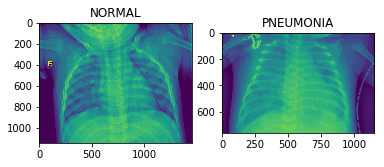

In [0]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1).set_title('NORMAL')
plt.imshow(plt.imread('/content/data/chest_xray/train/NORMAL/IM-0131-0001.jpeg'))

plt.subplot(1,2,2).set_title('PNEUMONIA')
plt.imshow(plt.imread('/content/data/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'))


### Graph

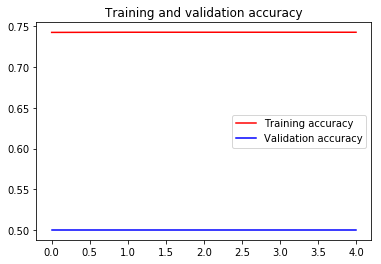

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()